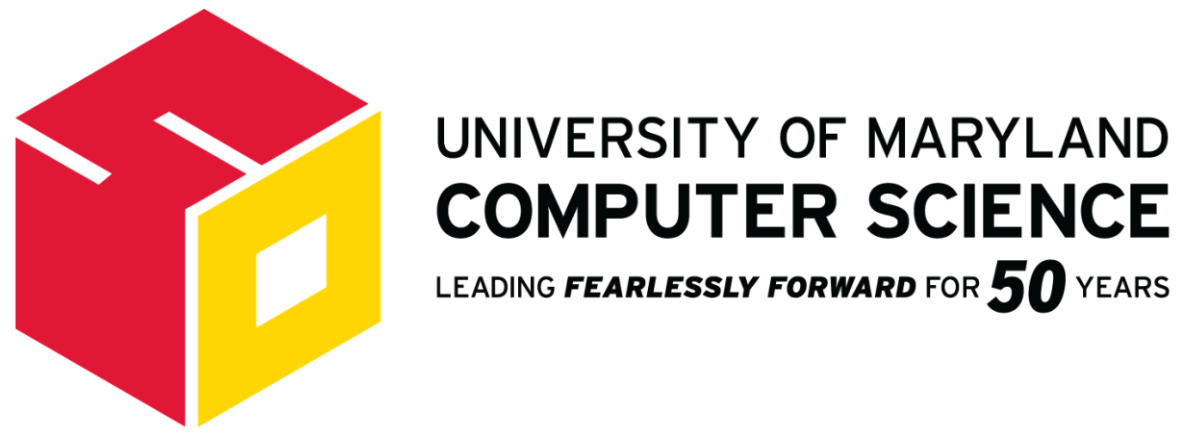

# Summary of HW5: Main Points

Over the course of the following homework you'll walk through a guided tutorial on **Regression** and its uses.

* We'll start with looking at regression on different relations in data (linear, quadratic, etc.).

* Then you'll work on building your own regression tool.

* You'll finish the homework by tying the ideas of these different relations (linear, quadratic) into neural networks to understand **why** we use neural networks.

### Section 1 : Basic Linear Regression (15 points)

Let's begin with **some straightforward linear regression** on some basic datasets. Take a look at the data we are using below.

##### Dataset Preparation (DO NOT MODIFY!)
Below is the essential code for preparing our dataset for analysis. **Please do not alter this code**. Instead, observe and understand the steps being taken.

Once our dataset is ready, we will proceed to train our linear regression model and evaluate how well it explains the data.

The dataset includes:

- (1) "linear" : A linear dataset
- (2) "convex" : second-order polynomial Dataset
- (3) "trigonometric" : high-order trigonometric Dataset


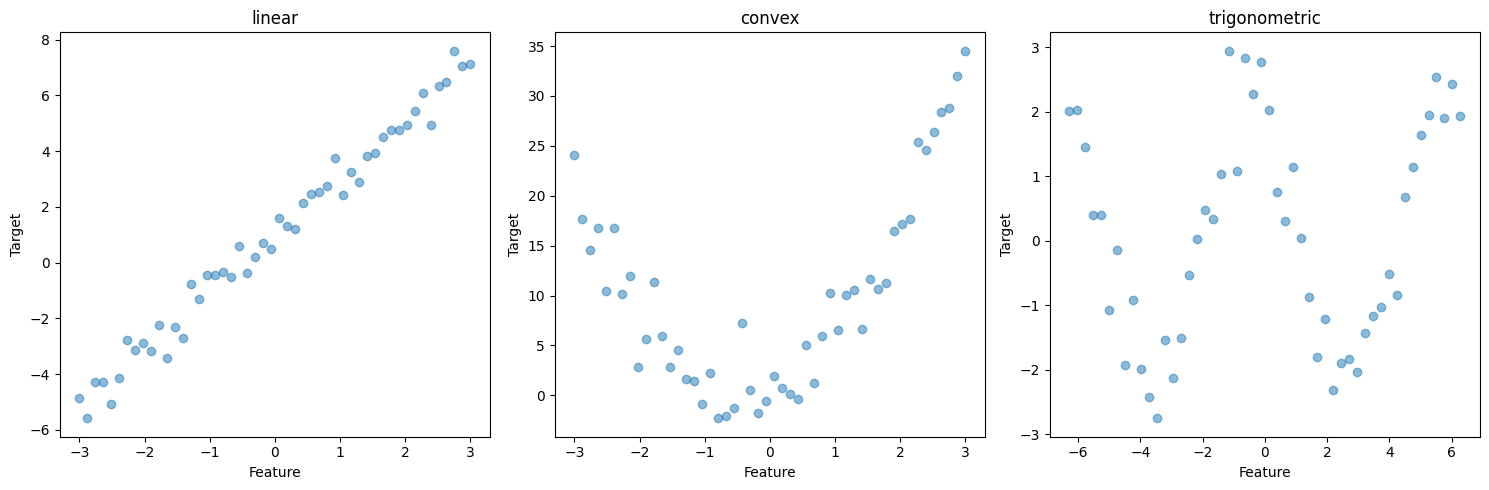

In [1]:
import numpy as np
import matplotlib.pyplot as plt


### DO NOT MODIFY
def generate_polynomial_dataset(weights, n_samples=100, noise_level=0.1):
    """Generate a polynomial dataset."""
    X = np.linspace(-3, 3, n_samples).reshape(-1, 1)
    y = np.zeros(n_samples)
    for i, weight in enumerate(weights):
        y += weight * (X ** i).flatten()
    y += np.random.normal(0, noise_level, size=n_samples)  # Adding noise

    return X, y

def generate_trigonometric_dataset(w_c, w_s, n_samples=100, noise_level=0.1):
    """Generate a trigonometric dataset."""
    X = np.linspace(-2 * np.pi, 2 * np.pi, n_samples).reshape(-1, 1)
    y = w_c * np.cos(X).flatten() + w_s * np.sin(X).flatten()
    y += np.random.normal(0, noise_level, size=n_samples)  # Adding noise

    return X, y

datasets = {
    "linear": generate_polynomial_dataset([1, 2], 50, 0.5),
    "convex": generate_polynomial_dataset([1, 2, 3], 50, 2.5),
    "trigonometric": generate_trigonometric_dataset(2, -1, 50, 0.5)
}


# Create the subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot each dataset
for ax, dataset in zip(axes, datasets.items()):
    title, (X, y) = dataset
    ax.scatter(X, y, alpha=0.5)
    ax.set_title(title)
    ax.set_xlabel('Feature')
    ax.set_ylabel('Target')

plt.tight_layout()
plt.show()
### DO NOT MODIFY

Above, we visualize these datasets for you to gather some ideas about how they look. Look at the visualizations and consider: What are your thoughts on using linear regression to model the non-linear patterns observed in the convex and trigonometric datasets? Do you believe linear regression is adaptable enough to accurately capture these complex relationships? (THIS IS NOT A TASK, JUST A WARM-UP for your thought process before you start working on your tasks next)

##### 1.1. Preparation of Training and Testing Sets (2 pts)

TASK: We will now **divide our three datasets into training and testing sets**.

For this task, you might want utilize the *train_test_split* function from *sklearn*. This step is crucial for preparing our data for the upcoming linear regression modeling, ensuring that we have separate sets for training our models and evaluating their performance.


In [2]:
from sklearn.model_selection import train_test_split

# Our datasets
X_linear, Y_linear = datasets["linear"]
X_convex, Y_convex = datasets["convex"]
X_tri, Y_tri = datasets["trigonometric"]

random_state = 42
np.random.seed(random_state)

##### Instruction: You have to define X_*_train, X_*_test, Y_*_train and Y_*_test for each (X,y) pair
##### Your Code Below
X_linear_train, X_linear_test, Y_linear_train, Y_linear_test = train_test_split(X_linear, Y_linear, test_size=0.2, random_state=random_state)
X_convex_train, X_convex_test, Y_convex_train, Y_convex_test = train_test_split(X_convex, Y_convex, test_size=0.2, random_state=random_state)
X_tri_train, X_tri_test, Y_tri_train, Y_tri_test = train_test_split(X_tri, Y_tri, test_size=0.2, random_state=random_state)

Now, let's **visualize our split dataset**. You can just use the below functions to plot them.

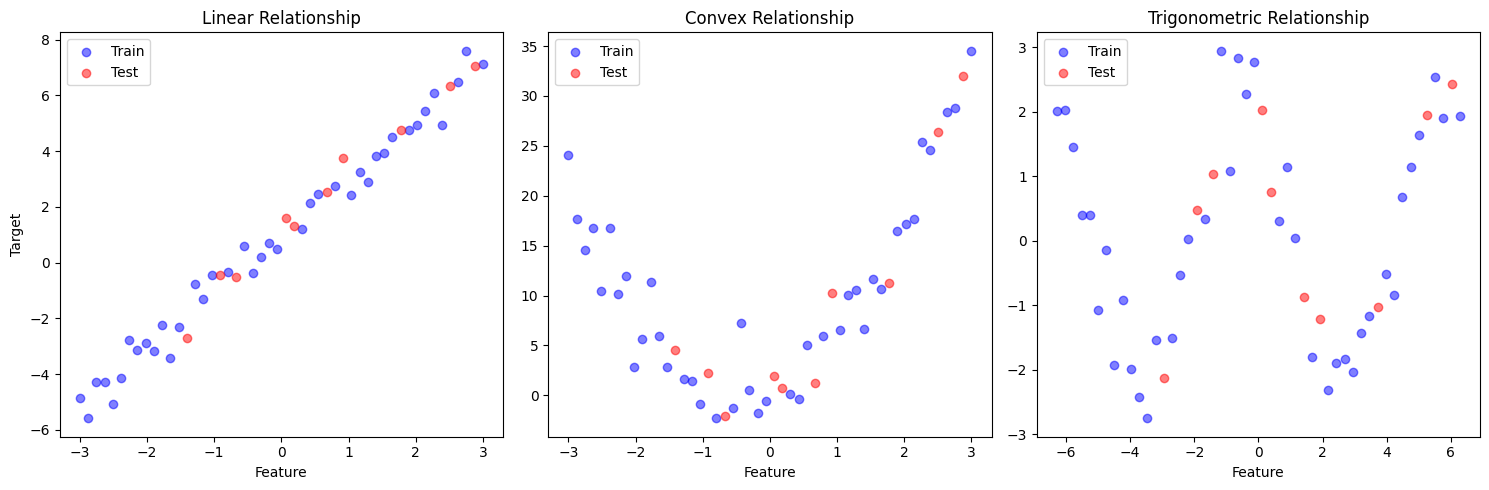

In [3]:
# Create the subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot the linear dataset
axes[0].scatter(X_linear_train, Y_linear_train, color='blue', label='Train', alpha=0.5)
axes[0].scatter(X_linear_test, Y_linear_test, color='red', label='Test', alpha=0.5)
axes[0].set_title('Linear Relationship')
axes[0].set_xlabel('Feature')
axes[0].set_ylabel('Target')
axes[0].legend()

# Plot the convex dataset
axes[1].scatter(X_convex_train, Y_convex_train, color='blue', label='Train', alpha=0.5)
axes[1].scatter(X_convex_test, Y_convex_test, color='red', label='Test', alpha=0.5)
axes[1].set_title('Convex Relationship')
axes[1].set_xlabel('Feature')
axes[1].legend()

# Plot the trigonometric dataset
axes[2].scatter(X_tri_train, Y_tri_train, color='blue', label='Train', alpha=0.5)
axes[2].scatter(X_tri_test, Y_tri_test, color='red', label='Test', alpha=0.5)
axes[2].set_title('Trigonometric Relationship')
axes[2].set_xlabel('Feature')
axes[2].legend()

plt.tight_layout()
plt.show()

##### 1.2. Linear Regression: Fit a line for the given dataset (2 pts)

TASK: **Fit a line for each of the 3 datasets!**

*Instructions:* You must fit on the training data and then do predictions for both the training and test sets. Use the training prediction for plotting, and the test prediction for evaluation.

*Hint: You can use LinearRegssion from sklearn.linear_model*

In [4]:
# Re-import the necessary module for LinearRegression
from sklearn.linear_model import LinearRegression

##### Instruction: You have to estimate Y_*_train_pred and Y_*_test_pred for each dataset.
##### Your Code Below

# first create linear regression models
linear_reg_linear = LinearRegression()
linear_reg_convex = LinearRegression()
linear_reg_tri = LinearRegression()

# then fit the models to the training data
linear_reg_linear.fit(X_linear_train, Y_linear_train)
linear_reg_convex.fit(X_convex_train, Y_convex_train)
linear_reg_tri.fit(X_tri_train, Y_tri_train)

# this makes predictions for training and test sets
Y_linear_train_pred = linear_reg_linear.predict(X_linear_train)
Y_convex_train_pred = linear_reg_convex.predict(X_convex_train)
Y_tri_train_pred = linear_reg_tri.predict(X_tri_train)

Y_linear_test_pred = linear_reg_linear.predict(X_linear_test)
Y_convex_test_pred = linear_reg_convex.predict(X_convex_test)
Y_tri_test_pred = linear_reg_tri.predict(X_tri_test)

Plots below! We'll use the test predictions later.

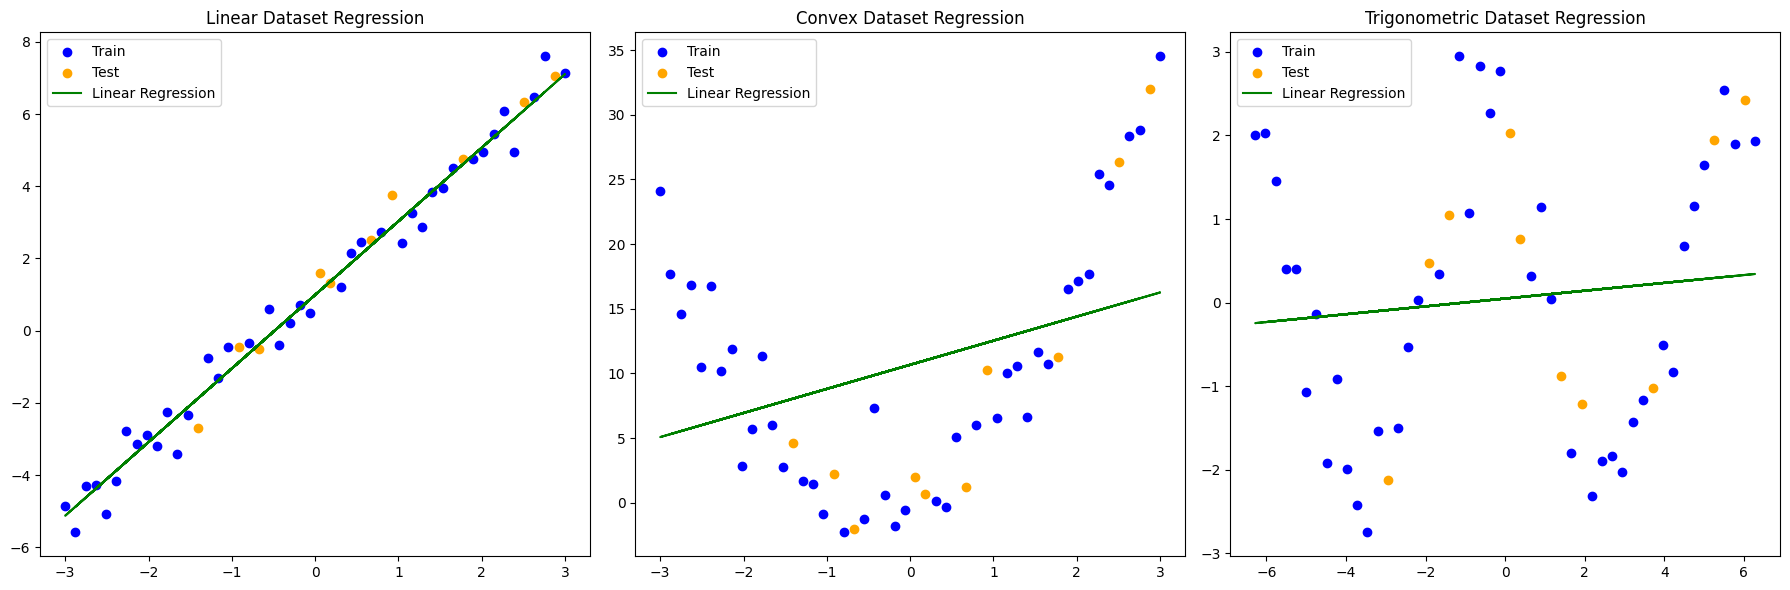

In [5]:
# Plot the results along with the regression lines for each dataset
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Linear dataset and model
axes[0].scatter(X_linear_train, Y_linear_train, color='blue', label='Train')
axes[0].scatter(X_linear_test, Y_linear_test, color='orange', label='Test')
axes[0].plot(X_linear_train, Y_linear_train_pred, color='green', label='Linear Regression')
axes[0].set_title('Linear Dataset Regression')
axes[0].legend()

# Convex dataset and model
axes[1].scatter(X_convex_train, Y_convex_train, color='blue', label='Train')
axes[1].scatter(X_convex_test, Y_convex_test, color='orange', label='Test')
axes[1].plot(X_convex_train, Y_convex_train_pred, color='green', label='Linear Regression')
axes[1].set_title('Convex Dataset Regression')
axes[1].legend()

# Trigonometric dataset and model
axes[2].scatter(X_tri_train, Y_tri_train, color='blue', label='Train')
axes[2].scatter(X_tri_test, Y_tri_test, color='orange', label='Test')
axes[2].plot(X_tri_train, Y_tri_train_pred, color='green', label='Linear Regression')
axes[2].set_title('Trigonometric Dataset Regression')
axes[2].legend()

plt.tight_layout()
plt.show()

##### 1.3. Linear Model Evaluation (2 pts)
TASK: Calculate the Mean Squared Error (MSE) and $R^2$ coefficient for each training and test spllit.

In [6]:
from sklearn.metrics import mean_squared_error, r2_score

##### Instruction: You have to estimate mse_*_train, mse_*_test, r2_*_train, r2_*_test
##### Your Code Below

# Calculate MSE and R^2 for the linear dataset
mse_linear_train = mean_squared_error(Y_linear_train, Y_linear_train_pred)
mse_linear_test = mean_squared_error(Y_linear_test, Y_linear_test_pred)
r2_linear_train = r2_score(Y_linear_train, Y_linear_train_pred)
r2_linear_test = r2_score(Y_linear_test, Y_linear_test_pred)

# Calculate MSE and R^2 for the convex dataset
mse_convex_train = mean_squared_error(Y_convex_train, Y_convex_train_pred)
mse_convex_test = mean_squared_error(Y_convex_test, Y_convex_test_pred)
r2_convex_train = r2_score(Y_convex_train, Y_convex_train_pred)
r2_convex_test = r2_score(Y_convex_test, Y_convex_test_pred)

# Calculate MSE and R^2 for the trigonometric dataset
mse_tri_train = mean_squared_error(Y_tri_train, Y_tri_train_pred)
mse_tri_test = mean_squared_error(Y_tri_test, Y_tri_test_pred)
r2_tri_train = r2_score(Y_tri_train, Y_tri_train_pred)
r2_tri_test = r2_score(Y_tri_test, Y_tri_test_pred)

In [7]:
# Organize the results into a structured format
results = {
    "Linear": {
        "MSE Train": mse_linear_train,
        "MSE Test": mse_linear_test,
        "R2 Train": r2_linear_train,
        "R2 Test": r2_linear_test
    },
    "Convex": {
        "MSE Train": mse_convex_train,
        "MSE Test": mse_convex_test,
        "R2 Train": r2_convex_train,
        "R2 Test": r2_convex_test
    },
    "Trigonometric": {
        "MSE Train": mse_tri_train,
        "MSE Test": mse_tri_test,
        "R2 Train": r2_tri_train,
        "R2 Test": r2_tri_test
    }
}

# Print the results
for dataset, metrics in results.items():
    print(f"{dataset} Dataset:")
    print(f"  MSE Train: {metrics['MSE Train']:.4f}")
    print(f"  MSE Test: {metrics['MSE Test']:.4f}")
    print(f"  R2 Train: {metrics['R2 Train']:.4f}")
    print(f"  R2 Test: {metrics['R2 Test']:.4f}")
    print()  # Add a blank line for better readability

Linear Dataset:
  MSE Train: 0.2416
  MSE Test: 0.2029
  R2 Train: 0.9828
  R2 Test: 0.9772

Convex Dataset:
  MSE Train: 77.3837
  MSE Test: 87.4212
  R2 Train: 0.1297
  R2 Test: 0.2728

Trigonometric Dataset:
  MSE Train: 2.7961
  MSE Test: 2.1418
  R2 Train: 0.0113
  R2 Test: 0.0401



##### 1.4. Discussion about the Evaluation Results. (2 pts)

TASK: Answer following questions:

- Does our model working well for each dataset? Explain based on the calculated metrics above.
- Explain what $R^2$ coefficient is. Discuss what it indicates about a model's performance when $R^2 =0 $ and $R^2 = 1$

italicized text

*Your Answer Here!*

For the linear dataset:
*   The MSE vals for both the training and test sets are relatively low which indicates a good model performance in terms of prediction accuracy.
*   The R2 coeff is high (close to 1) for both training and test sets which suggests that the model explains a high percentage of the variance in the data ich indicates a strong fit of the model to the data.

For the convex dataset:
*   The MSE vals are quite high for both training and test sets indicating that the model doesn't perform well in terms of prediction accuracy for this dataset.
*   The R2 coeff is low for both training and test sets (close to 0) which suggests that model does not explain much of the variance in the data which indicates a poor fit of the model to the data.

For trig dataset:
*   The MSE vals are relatively low compared to the convex dataset but higher than the linear dataset, indicating moderat prediction accuracy.
*   The R2 coeff is close to 0 for both training sets suggesting that the model does not explain much of the variance in the data indicating a weak fit of the model to the data.

R2 coeff measures the proportion of variance in the dep vars that is predicitable from the indep vars. When R2 is 0, it means that the model does not explain any of the variance in the target var. When R2 is 1, it means that the model perfectly predicts the target var based on the indep vars capturing all the variance in the data.




##### 1.5. Implement Polynomial Features (2 pts)


> In this section, we'll explore how to use polynomial features to transform non-linear relationships into linear ones, enabling us to apply linear regression effectively.



If we could project ourselves into a dimension where non-linear relationships **become** linear, we could do linear regression! Let's try that now with polynomial features.


You can think of these features like this...

Consider this: a relationship like $y = x^2$ is non-linear. However, if we introduce a new variable $\alpha = x^2$, our equation becomes $y = \alpha$. Now, when we plot $y$ against $\alpha$, we'll observe a linear relationship!

* $ y = x^2$ is non linear right?
* What if we said $\alpha = x^2$, so $y = \alpha$?
*Then if you plot $y$ versus $\alpha$ you would get a linear relationship!


We recommend using the sklearn ['make_pipeline'](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.make_pipeline.html) and ['PolynomialFeatures'](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html#sklearn.preprocessing.PolynomialFeatures) for this part.

TASK: Given the provided code below, your task is to implement polynomial regression models for three distinct datasets: linear, convex, and trigonometric to predict outcomes for both training and test data for each dataset :

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Define degrees for polynomial features
degree_linear = 1  # For the linear dataset, a degree of 1 is just a linear relationship
degree_convex = 3  # For the convex dataset, let's try a quadratic model
degree_tri = 10  # For the trigonometric dataset, a higher degree might capture the sine/cosine waves

##### Instruction: You have to estimate Y_*_train_pred_poly and Y_*_test_pred_poly
##### Your Code Below

# create poly regression models using make_pipeline
linear_reg_poly = make_pipeline(PolynomialFeatures(degree_linear), LinearRegression())
convex_reg_poly = make_pipeline(PolynomialFeatures(degree_convex), LinearRegression())
tri_reg_poly = make_pipeline(PolynomialFeatures(degree_tri), LinearRegression())

# fit the poly regression models on the training data
linear_reg_poly.fit(X_linear_train, Y_linear_train)
convex_reg_poly.fit(X_convex_train, Y_convex_train)
tri_reg_poly.fit(X_tri_train, Y_tri_train)

# Predict on the training data to plot the regression lines
Y_linear_train_pred_poly = linear_reg_poly.predict(X_linear_train)
Y_convex_train_pred_poly = convex_reg_poly.predict(X_convex_train)
Y_tri_train_pred_poly = tri_reg_poly.predict(X_tri_train)

# Predict on the test data for evaluation
Y_linear_test_pred_poly = linear_reg_poly.predict(X_linear_test)
Y_convex_test_pred_poly = convex_reg_poly.predict(X_convex_test)
Y_tri_test_pred_poly = tri_reg_poly.predict(X_tri_test)

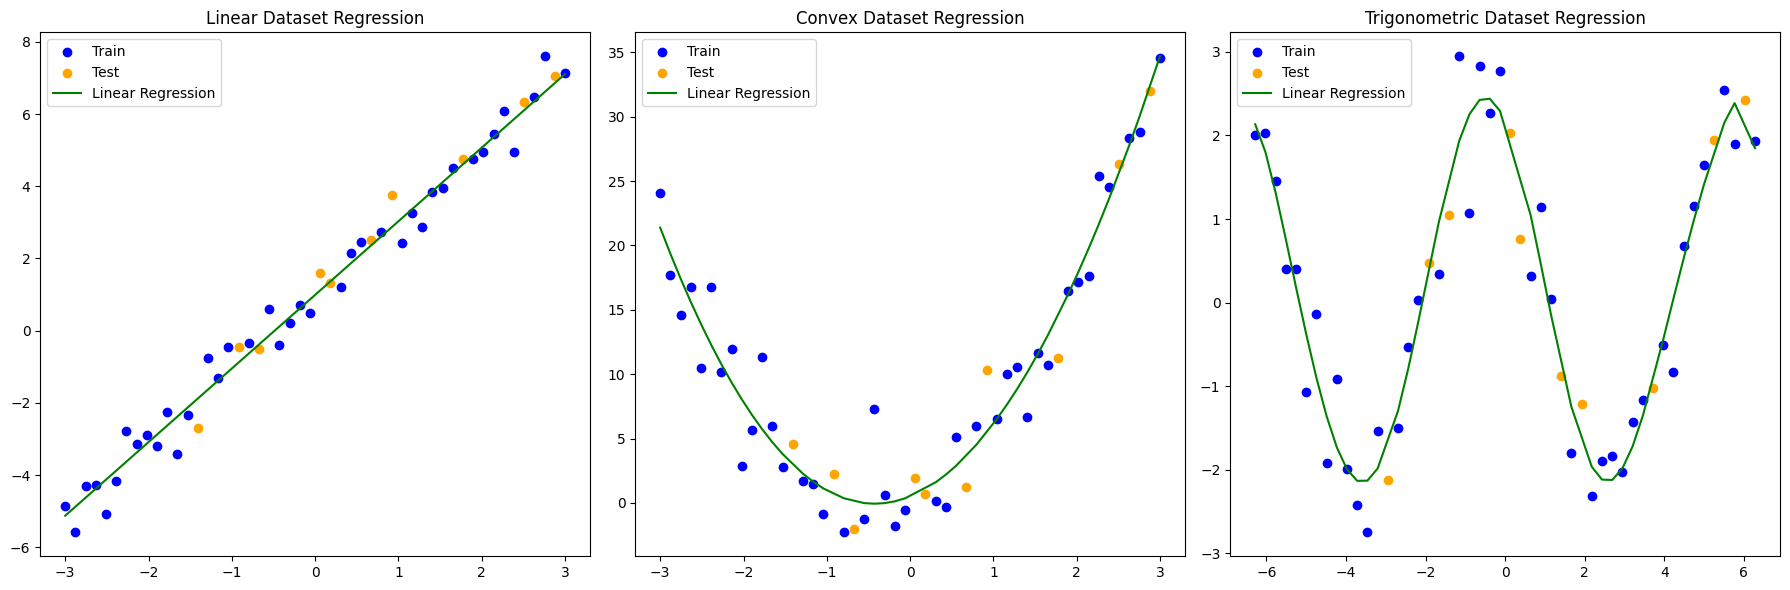

In [9]:
# Plot the results along with the regression lines for each dataset
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Prepare sorted X values for plotting polynomial regression lines
X_linear_train_sorted_idx = np.argsort(X_linear_train.ravel())
X_convex_train_sorted_idx = np.argsort(X_convex_train.ravel())
X_tri_train_sorted_idx = np.argsort(X_tri_train.ravel())

# Linear dataset and model
axes[0].scatter(X_linear_train, Y_linear_train, color='blue', label='Train')
axes[0].scatter(X_linear_test, Y_linear_test, color='orange', label='Test')
axes[0].plot(X_linear_train[X_linear_train_sorted_idx], Y_linear_train_pred_poly[X_linear_train_sorted_idx], color='green', label='Linear Regression')
axes[0].set_title('Linear Dataset Regression')
axes[0].legend()

# Convex dataset and model
axes[1].scatter(X_convex_train, Y_convex_train, color='blue', label='Train')
axes[1].scatter(X_convex_test, Y_convex_test, color='orange', label='Test')
axes[1].plot(X_convex_train[X_convex_train_sorted_idx], Y_convex_train_pred_poly[X_convex_train_sorted_idx], color='green', label='Linear Regression')
axes[1].set_title('Convex Dataset Regression')
axes[1].legend()

# Trigonometric dataset and model
axes[2].scatter(X_tri_train, Y_tri_train, color='blue', label='Train')
axes[2].scatter(X_tri_test, Y_tri_test, color='orange', label='Test')
axes[2].plot(X_tri_train[X_tri_train_sorted_idx], Y_tri_train_pred_poly[X_tri_train_sorted_idx], color='green', label='Linear Regression')
axes[2].set_title('Trigonometric Dataset Regression')
axes[2].legend()

plt.tight_layout()
plt.show()

TASK: Next, you now have to calculate the Mean Squared Error (MSE) and R-squared ($R^2$) scores for both the training and test data for each polynomial regression model.

In [10]:
from sklearn.metrics import mean_squared_error, r2_score

##### Instruction: You have to estimate mse_*_test_poly, r2_*_test_poly, mse_*_train_poly, r2_*_train_poly
##### Your Code Below

# Calculate MSE and R^2 for the test data for each polynomial model
mse_linear_test_poly = mean_squared_error(Y_linear_test, Y_linear_test_pred_poly)
r2_linear_test_poly = r2_score(Y_linear_test, Y_linear_test_pred_poly)

mse_convex_test_poly = mean_squared_error(Y_convex_test, Y_convex_test_pred_poly)
r2_convex_test_poly = r2_score(Y_convex_test, Y_convex_test_pred_poly)

mse_tri_test_poly = mean_squared_error(Y_tri_test, Y_tri_test_pred_poly)
r2_tri_test_poly = r2_score(Y_tri_test, Y_tri_test_pred_poly)

# Calculate MSE and R^2 for the training data for each polynomial model
mse_linear_train_poly = mean_squared_error(Y_linear_train, Y_linear_train_pred_poly)
r2_linear_train_poly = r2_score(Y_linear_train, Y_linear_train_pred_poly)

mse_convex_train_poly = mean_squared_error(Y_convex_train, Y_convex_train_pred_poly)
r2_convex_train_poly = r2_score(Y_convex_train, Y_convex_train_pred_poly)

mse_tri_train_poly = mean_squared_error(Y_tri_train, Y_tri_train_pred_poly)
r2_tri_train_poly = r2_score(Y_tri_train, Y_tri_train_pred_poly)

In [11]:
# Print the MSE and R^2 values for both training and testing sets for each dataset with polynomial features
print("Linear Dataset with Polynomial Features:")
print(f"Train - MSE: {mse_linear_train_poly:.4f}, R^2: {r2_linear_train_poly:.4f}")
print(f"Test - MSE: {mse_linear_test_poly:.4f}, R^2: {r2_linear_test_poly:.4f}\n")

print("Convex Dataset with Polynomial Features:")
print(f"Train - MSE: {mse_convex_train_poly:.4f}, R^2: {r2_convex_train_poly:.4f}")
print(f"Test - MSE: {mse_convex_test_poly:.4f}, R^2: {r2_convex_test_poly:.4f}\n")

print("Trigonometric Dataset with Polynomial Features:")
print(f"Train - MSE: {mse_tri_train_poly:.4f}, R^2: {r2_tri_train_poly:.4f}")
print(f"Test - MSE: {mse_tri_test_poly:.4f}, R^2: {r2_tri_test_poly:.4f}\n")

Linear Dataset with Polynomial Features:
Train - MSE: 0.2416, R^2: 0.9828
Test - MSE: 0.2029, R^2: 0.9772

Convex Dataset with Polynomial Features:
Train - MSE: 6.4118, R^2: 0.9279
Test - MSE: 5.2074, R^2: 0.9567

Trigonometric Dataset with Polynomial Features:
Train - MSE: 0.2336, R^2: 0.9174
Test - MSE: 0.1306, R^2: 0.9415



##### 1.6. Discussion about the Evaluation Results. (2 pts)

TASK: Answer following questions:
- Does our model working well for each dataset? Explain based on the calculated metrics above.
- Let's play a little bit with degree_linear, degree_convex, degree_tri. Is is always beneficial to use higher-order degree features? What is the difference of underfitting and overfitting?

*Your Answer Here!*

For linear dataset w poly features:
*   The model performs well for both the training and test data as indicated by low vals and high R2 scores.
*   The R2 score of around 0.96 for the test data suggests that the model explains around 96% of the variance in the target var which is quite good.

For convex dataset w poly features:
*   The model also performs well for this dataset w relatively low MSE vals and high R2 scores for both training and test data.
*   The R2 score of around 0.95 for the test data indicates a good level of explanation of the variance in the target variable.

For trig dataset w poly features:
*   The model performs well on the training data with a low MSE and high R2 score, indicating a good fit to the training data.
*   However, on the test data, the MSE is higher, and the R2 score drops to around 0.72, suggesting that the model's performance decreases on unseen data. This could be a sign of overfitting.

It's not always beneficial to use higher-order degree features. While they can capture more complex relationships in the data, they also increase the model's complexity, which can lead to overfitting.

Overfitting occurs when the model learns the training data too well, including noise and outliers, which can lead to poor generalization to unseen data.

Underfitting, on the other hand, occurs when the model is too simple to capture the underlying patterns in the data, leading to poor performance on both training and test data.



##### 1.7. Ridge/Lasso Regression (3 pts)



> We've talked about overfitting/underfittingWe've in Machine Learning. One effective approach to address these issues is through the use of **regularization** methods or techniques.  These techniques introduce additional constraints or penalties to the optimization process, encouraging the development of simpler models that are less prone to overfitting. These constraints are usually applied to the model parameters during training, influencing their values to prevent them from becoming excessively large.

> Two common types of regularization used in regression are 'ridge' and 'lasso' regression. (technically, this involves adding an L1 or L2 term to the loss used for optimization... but this is a technicality).






Some interesting notes on the material...

- Interesting Material : https://medium.com/@tavishi.1402/regularization-techniques-lasso-and-ridge-90d3cc73ca4c

- https://medium.com/@nerdjock/lesson-18-machine-learning-regularization-techniques-l1-lasso-and-l2-ridge-regularization-b9dc312c71fe

- https://www.linkedin.com/pulse/regularization-l1lasso-l2ridge-mukesh-manral/?trk=pulse-article


- Lasso regression is interesting because it theoretically can perform linear regression in **feature space**. I.e. it theoretically can learn how to *linearly* separate transformations of the data that maximize the information gain from the raw data.


TASK: Your task is to implement both Ridge and Lasso regression and compare their performances. Determine, do they perform the same? If one is better than the other one, why do you think so..? **Back up your answers!!**



Additionally, implement **ElasticNet**, which combines elements of both Ridge and Lasso regression.

**All these modules can be found in sklearn.linear_model**


In [12]:
from sklearn.linear_model import Lasso, Ridge, ElasticNet, LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score

### DO NOT MODIFY
# Define a high degree for polynomial features for the trigonometric dataset
degree = 20

# Regularization strength for Ridge, Lasso, and ElasticNet
alpha_value = 0.01
### DO NOT MODIFY

##### Instruction: You have to define model_default, model_lasso, model_ridge, model_elastic
##### Your Code Below

# create poly features and models for Ridge, Lasso, ElasticNet, and Default Linear Regression
poly_features = PolynomialFeatures(degree=degree)
model_default = make_pipeline(poly_features, LinearRegression())
model_lasso = make_pipeline(poly_features, Lasso(alpha=alpha_value))
model_ridge = make_pipeline(poly_features, Ridge(alpha=alpha_value))
model_elastic = make_pipeline(poly_features, ElasticNet(alpha=alpha_value, l1_ratio=0.5))  # l1_ratio=0.5 for equal combination of L1 and L2


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.212e+00, tolerance: 8.482e-03
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=5.57495e-35): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.001e+00, tolerance: 8.482e-03
  model = cd_fast.enet_coordinate_descent(


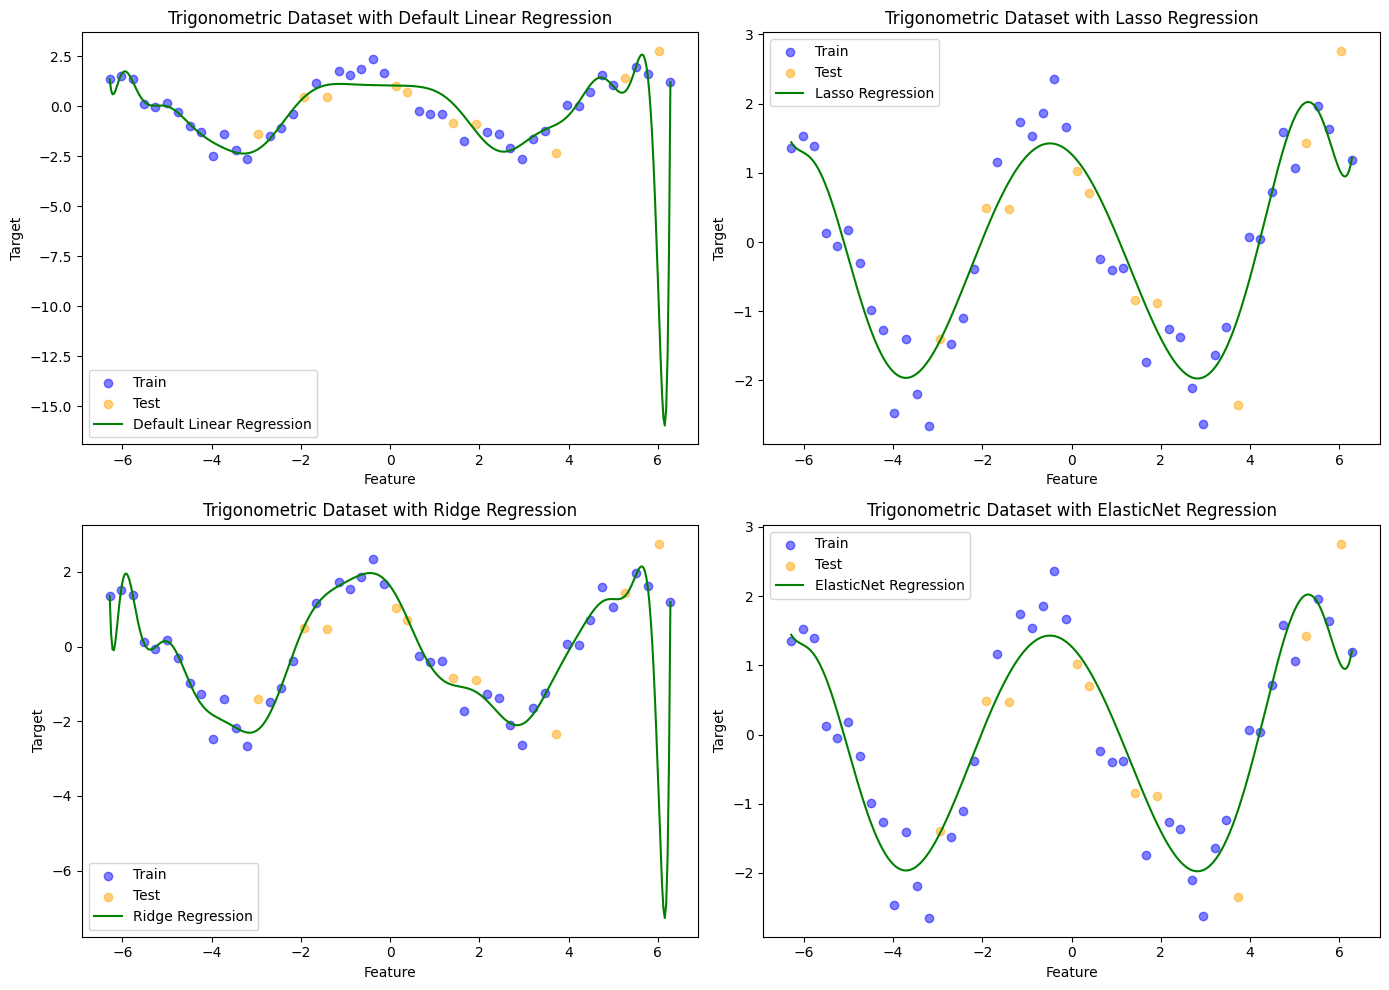

In [13]:
# Fit the models to the trigonometric training data
model_default.fit(X_tri_train, Y_tri_train)
model_lasso.fit(X_tri_train, Y_tri_train)
model_ridge.fit(X_tri_train, Y_tri_train)
model_elastic.fit(X_tri_train, Y_tri_train)

# Generate a dense grid for plotting
X_tri_dense = np.linspace(X_tri_train.min(), X_tri_train.max(), 400).reshape(-1, 1)

# Predict on the dense grid for smooth plotting
Y_tri_dense_pred_default = model_default.predict(X_tri_dense)
Y_tri_dense_pred_lasso = model_lasso.predict(X_tri_dense)
Y_tri_dense_pred_ridge = model_ridge.predict(X_tri_dense)
Y_tri_dense_pred_elastic = model_elastic.predict(X_tri_dense)

# Plot the results along with the regression lines for the trigonometric dataset
plt.figure(figsize=(14, 10))

# Default Linear Regression
plt.subplot(2, 2, 1)
plt.scatter(X_tri_train, Y_tri_train, color='blue', label='Train', alpha=0.5)
plt.scatter(X_tri_test, Y_tri_test, color='orange', label='Test', alpha=0.5)
plt.plot(X_tri_dense, Y_tri_dense_pred_default, color='green', label='Default Linear Regression')
plt.title('Trigonometric Dataset with Default Linear Regression')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.legend()

# Lasso Regression
plt.subplot(2, 2, 2)
plt.scatter(X_tri_train, Y_tri_train, color='blue', label='Train', alpha=0.5)
plt.scatter(X_tri_test, Y_tri_test, color='orange', label='Test', alpha=0.5)
plt.plot(X_tri_dense, Y_tri_dense_pred_lasso, color='green', label='Lasso Regression')
plt.title('Trigonometric Dataset with Lasso Regression')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.legend()

# Ridge Regression
plt.subplot(2, 2, 3)
plt.scatter(X_tri_train, Y_tri_train, color='blue', label='Train', alpha=0.5)
plt.scatter(X_tri_test, Y_tri_test, color='orange', label='Test', alpha=0.5)
plt.plot(X_tri_dense, Y_tri_dense_pred_ridge, color='green', label='Ridge Regression')
plt.title('Trigonometric Dataset with Ridge Regression')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.legend()

# ElasticNet Regression
plt.subplot(2, 2, 4)
plt.scatter(X_tri_train, Y_tri_train, color='blue', label='Train', alpha=0.5)
plt.scatter(X_tri_test, Y_tri_test, color='orange', label='Test', alpha=0.5)
plt.plot(X_tri_dense, Y_tri_dense_pred_elastic, color='green', label='ElasticNet Regression')
plt.title('Trigonometric Dataset with ElasticNet Regression')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.legend()

plt.tight_layout()
plt.show()

No, Ridge and Lasso regression to not perform the same. Looking at the plots, Ridge looks like it performs better than Lasso.

The reason for this may be:
Ridge Regression is more suitable when dealing with highly correlated features. It tends to shrink the coefficients of correlated features towards each other, preventing one feature from dominating the model. In contrast, Lasso Regression may arbitrarily select one of the correlated features and reduce the coefficients of others to zero, potentially losing information.

Ridge Regression tends to produce smaller coefficients compared to Lasso Regression, especially when there are highly correlated features. Smaller coefficients can lead to a more stable and interpretable model, reducing the risk of overfitting.

Ridge Regression does not perform feature selection like Lasso Regression does. This can be beneficial when all features are relevant and removing any of them would lead to a loss of information. Ridge Regression retains all features but reduces their impact through regularization.

Ridge Regression is more robust to outliers compared to Lasso Regression. Lasso Regression may be influenced significantly by outliers, as it can eliminate features with large residuals by setting their coefficients to zero.

Ridge Regression tends to have higher bias but lower variance compared to Lasso Regression. In situations where reducing model complexity is not critical and a balance between bias and variance is desired, Ridge Regression can be more suitable.

### Section 2: Linear Regression Model Design (15 points)

The mean-squared error loss is one of the basic loss that can be used for linear regression.

$$L_\text{MSE} = \frac{1}{n}\sum_{i=1}^n(\hat{Y}_i - Y_i)^2$$
$$\hat{Y}_i = \theta_1 X_i + \theta_2$$

Reminder: $\frac{\partial f}{\partial x}$ means taking the derivative of $f$ with respect to $x$, assuming ALL other variables are constants.

Sources:

https://tutorial.math.lamar.edu/classes/calciii/partialderivatives.aspx

https://tutorial.math.lamar.edu/classes/calci/DerivativeIntro.aspx



##### 2.1. Derive the gradients $\frac{\partial L}{\partial\theta_1}, \frac{\partial L}{\partial\theta_2}$ (3 pts).



**Student Response** (preferred latex, equation must be readable)

First subsititute Ŷi into the linear regression equation:

L = (1/n)∑ from i = 1 to n (θ1∗Xi+θ2−Yi)^2

Then derive the gradients:

(∂L)/(∂θ1) = (2/n)∑ from i = 1 to n (θ1∗Xi+θ2−Yi) * Xi

(∂L)/(∂θ2) = (2/n)∑ from i = 1 to n (θ1∗Xi+θ2−Yi)

##### 2.2 Implement our SimpleLinearRegression class (8 pts)





TASK: Your task is to complete the implementation of a Simple Linear Regression model using gradient descent from scratch.

You may have to follow these steps: <br>

* Initialize model parameters.
* Implement gradient descent to iteratively update the model parameters.

In [17]:
import numpy as np
import matplotlib.pyplot as plt

class SimpleLinearRegression:
    def __init__(self, learning_rate=0.01, iterations=1000):
        self.learning_rate = learning_rate
        self.iterations = iterations
        # Your code here. Initialize m and b
        self.m = 0 # slope param
        self.b = 0 # intercept param


    def fit(self, X, Y):
        # Your code here. Perform gradient descent
        n = len(X)
        for _ in range(self.iterations):

            # predicted vals
            Y_pred = self.m * X + self.b

            # gradient descent updates
            d_m = (-2/n) * np.sum(X * (Y - Y_pred))
            d_b = (-2/n) * np.sum(Y - Y_pred)

            self.m -= self.learning_rate * d_m
            self.b -= self.learning_rate * d_b

    def predict(self, X):
        # Your code here.
        return self.m * X + self.b

    def plot_regression_line(self, X, Y):
        # Predict values
        Y_pred = self.predict(X)

        # Plotting the regression line and the data points
        # Plot your predictions on X.
        plt.scatter(X, Y, color='blue', label='Actual data')
        plt.plot(X, Y_pred, color='red', label='Fitted line')
        plt.title('Linear Regression Using Gradient Descent')
        plt.xlabel('X')
        plt.ylabel('Y')
        plt.legend()
        plt.show()

The following code will test your implementation.

In [18]:
### DO NOT MODIFY
def test_linear_regression(model, X, Y):
    model.fit(X, Y)
    predictions = model.predict(X)

    relative_error = np.mean(np.abs((Y - predictions) / (Y + 1e-8)))
    return relative_error < 0.02

test_datasets = [
    (np.array([1, 2, 3, 4, 5]), np.array([2, 4, 6, 8, 10])),
    (np.array([1, 2, 3, 4, 5]), np.array([1, 4, 9, 16, 25])),
    (np.array([0, 0, 1, 1]), np.array([0, 1, 1, 0]))
]

# Initialize the model
model = SimpleLinearRegression(learning_rate=0.001, iterations=5000)


# Test each dataset
results = [test_linear_regression(model, X, Y) for X,Y in test_datasets]
answers = [True, False, False]
if results == answers:
  print("Good job!")
else:
  print("Wrong Implmentation! Your linear regression model needs more testing!")
  assert(False)

### DO NOT MODIFY

Good job!


##### 2.3 Train your model (4 pts)
TASK:
- Train your *SimpleLinearRegression* model
- Visualize the data (*You can use "plot_regression_line"*)

The following code will visualize your regression results. Use the model to **predict the scores for studying 1.5 hours and 3.5 hours**.

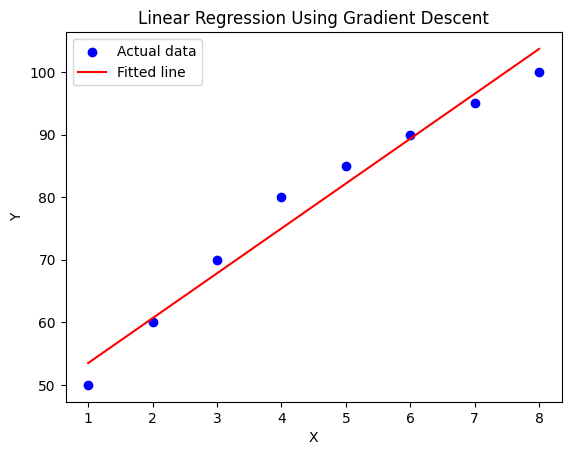

Predicted scores for 1.5 hours and 3.5 hours studied: [57.0813557  71.41872303]


In [19]:
### DO NOT MODIFY
# Given dataset
X = np.array([1, 2, 3, 4, 5, 6, 7, 8])  # Hours Studied
Y = np.array([50, 60, 70, 80, 85, 90, 95, 100])  # Test Score

X_test = np.array([1.5, 3.5])
### DO NOT MODIFY

##### Your code below

# train
model = SimpleLinearRegression()
model.fit(X, Y)

# visualize
model.plot_regression_line(X, Y)

# predict scores for 1.5 hours and 3.5 hours
predicted_scores = model.predict(X_test)
print("Predicted scores for 1.5 hours and 3.5 hours studied:", predicted_scores)

# Section 3 : Can Regression do Classification? (15 points)
Starting at the beginning, linear models are the simplest type of model possible. They imply that our data, when graphed in a mathematical basis, can be separated by a curve that is a line (in 2 dimensions), a plane (in 3 dimensions), or a hyperplane (> 3 dimensions).


What about using what we've done for classification? Can we apply our newfound regression skills to classify things? Let's try! You already have a lot of knowledge about classification, so some of the basics from the last homework will not be repeated.

Consider the following plot

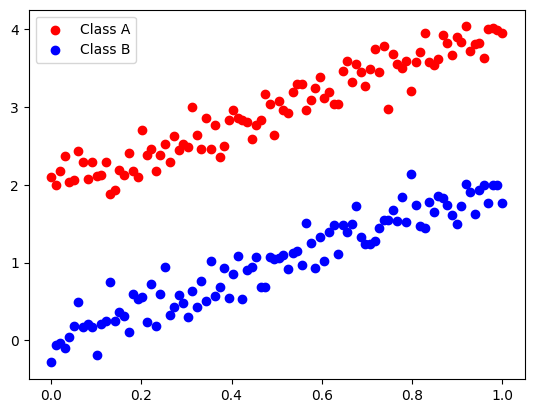

In [20]:
# # # DO NOT MODIFY # # #
x_axis = np.linspace(0, 1, 100)
class_a = 2 * x_axis + 1 + np.random.normal(1, 0.2, x_axis.shape[0])
class_b = 2 * x_axis + 1 + np.random.normal(-1, 0.2, x_axis.shape[0])

plt.scatter(x_axis, class_a, color='r', label='Class A')
plt.scatter(x_axis, class_b, color='b', label='Class B')
plt.legend()

There is a very evident line that separates our classes here, one that we humans could easily draw by hand. Let's see if we can get a computer to find this for us!

### Question 1: GD Linear Classifier

We wish to create a function of the form

$$ g(x) = mx + b$$

where $m$ is the slope of a line, $b$ is a bias term, and $x$ is the function variable. But! More specifically, we want our output $f$ to be a 'class'... a binary choice (in the case of 2 classes). So instead we will define..

$$ f(x) = 1 \space\text{if}\space y > g(x) \space \text{else} \space 0$$

where a 1 represents class 'A', and 0 represents class 'B'.

So, we parameterize the curve like so...

$$ g(x) = \theta_1 x + \theta_2 $$

meaning I can define

$$g(x;\theta) = \theta_1 x + \theta_2$$

and $g$ in a similar fashion.

In theory, there exists at least one (we can draw it) line $g^* (x;\theta^*)$ that perfectly separates the data. The $^*$ represents 'optimal'.

The mathematically curious among you may choose to verify that there is a way to calculate the EXACTLY correct answer here, but for now we will choose to use an optimization technique to hone in on the correct values for $\theta_1, \theta_2$.

The optimization we will choose to use is standard gradient descent, where using the chain rule we can find the direction in which to optimize $\vec{\theta}$ such that we approach an optimal solution.

This means we will **start** by effectively training a linear regression model and using for classification. Just as a sneak peak ahead, what do you think might go wrong? (no need to answer, just think about it)

This is your data to use below. Do not modify it, just the variable names. **You should only access x_data_full and y_data_full in your code!!**

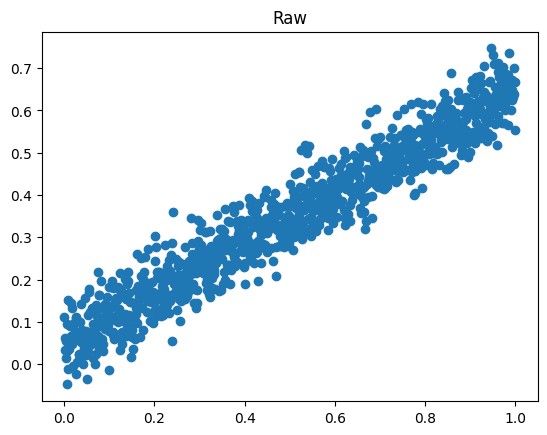

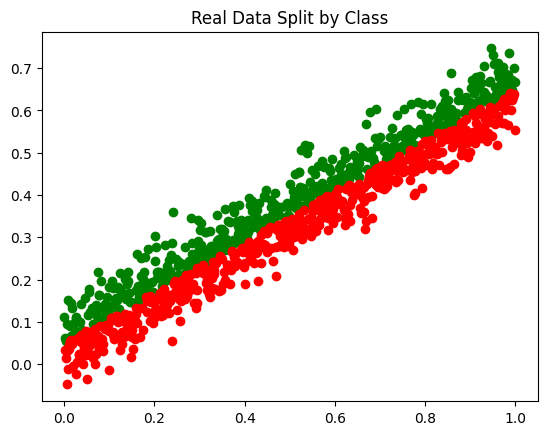

In [ ]:
# # # DO NOT MODIFY # # #

m_star = 0.6
b_star = 0.05

x_data_full = np.linspace(0, 1, 1000)
y_data_full = m_star * x_data_full + b_star + np.random.normal(0, 0.05,
                                                          x_data_full.shape[0])
plt.scatter(x_data_full, y_data_full)
plt.title("Raw")
plt.show()

def calc(theta, x_data):
  return theta[0] * x_data + theta[1]

calced_values = calc([m_star, b_star], x_data_full)
true_x_a = []
true_x_b = []
true_y_a = []
true_y_b = []
for i in range(x_data_full.shape[0]):
  val = y_data_full[i]
  if val > calced_values[i]:
    true_x_a.append(x_data_full[i])
    true_y_a.append(y_data_full[i])
  else:
    true_x_b.append(x_data_full[i])
    true_y_b.append(y_data_full[i])

plt.scatter(true_x_a, true_y_a, color='g')
plt.scatter(true_x_b, true_y_b, color='r')
plt.title("Real Data Split by Class")
plt.show()

#### Part 1 (1 point)

TASK: Create a numpy vector for theta, randomize it below.** You may choose any method of randomly generating it you like **besides hardcoding the values!!**

In [21]:
# # # STUDENT INPUT # # #
# Place your answers here
theta = np.random.rand(2)
print("Random theta vector:", theta)

Random theta vector: [0.87737307 0.74076862]


#### Part 2 (3 points)


TASK: **Plot the line** created by your theta and **color everything **that is classified correctly green, and everything incorrectly red.**

**Assume that everything above the line is class A, everything below is class B**

**HINT: It may be useful to create a function for this task in the future. Given a theta, and the dataset, highlight correct values.**

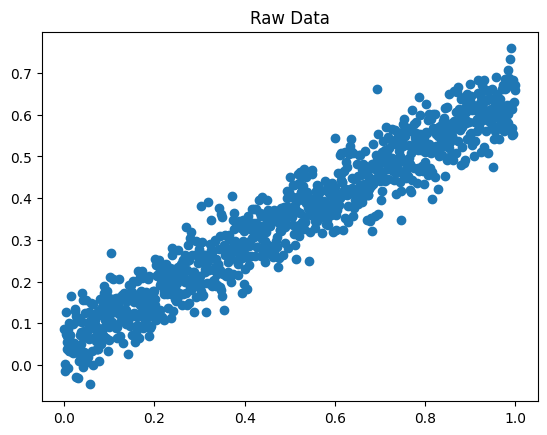

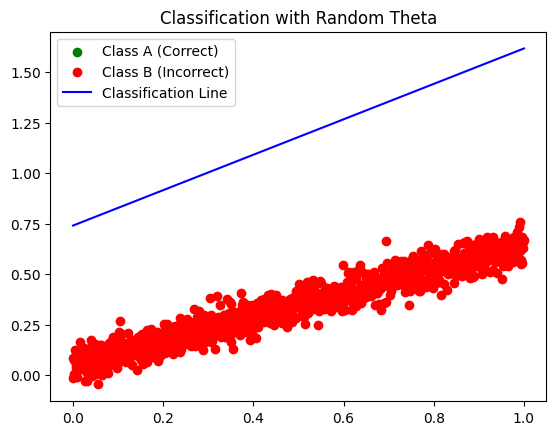

In [25]:
def calc(el, x_data):
  return el[0] * x_data + el[1]

def separate(x_data, y_data, el):
  calced_values = calc(el, x_data)

  true_x_a = []
  true_x_b = []
  true_y_a = []
  true_y_b = []
  for i in range(x_data.shape[0]):
    val = y_data[i]
    if val > calced_values[i]:
      true_x_a.append(x_data[i])
      true_y_a.append(y_data[i])
    else:
      true_x_b.append(x_data[i])
      true_y_b.append(y_data[i])

  return (true_x_a, true_y_a), (true_x_b, true_y_b)

# # # STUDENT INPUT # # #
# Place your answers here

# given data
m_star = 0.6
b_star = 0.05
x_data_full = np.linspace(0, 1, 1000)
y_data_full = m_star * x_data_full + b_star + np.random.normal(0, 0.05, x_data_full.shape[0])

# plot the raw data
plt.scatter(x_data_full, y_data_full)
plt.title("Raw Data")
plt.show()

# plot the line and classify points
true_class_a, true_class_b = separate(x_data_full, y_data_full, theta)
plt.scatter(true_class_a[0], true_class_a[1], color='g', label='Class A (Correct)')
plt.scatter(true_class_b[0], true_class_b[1], color='r', label='Class B (Incorrect)')
plt.plot(x_data_full, calc(theta, x_data_full), color='b', label='Classification Line')
plt.legend()
plt.title("Classification with Random Theta")
plt.show()

Way off!! Let's do some regression work now and get into the nitty gritty. This is just like what you did before.

#### Part 3: Write a function for the loss (1 point)

TASK: Define your loss function as the MSE loss.

In [26]:
# # # STUDENT INPUT # # #
# Place your answers here

def mse_loss(true_values, predictions):
  return np.mean((true_values - predictions) ** 2)

#### Part 4: Training Loop (5 points)

TASK: Now write the training loop...

1. Start with your initialized theta.
2. Fix the learning rate (we've fixed it for you)
3. Define the number of steps to run (we've fixed that too!)
4. For each step, perform a training step. Print the loss, **if you'd like**. **Do print the final loss**. **You have a simple linear regression model from earlier**
5. After the last step, graph your line and classify the points. If they're above your line, it's class A. If they're below, class B.
6. Graph your line, and the two classes as you drew them.
7. Compare your output to the real line that separates the classes. How far off were you? How many points did you miss?


Step 0: Loss = 0.0036021201984771985
Step 100: Loss = 0.0024412372161790635
Step 200: Loss = 0.0024412372161790635
Step 300: Loss = 0.0024412372161790635
Step 400: Loss = 0.0024412372161790635
Step 500: Loss = 0.0024412372161790635
Step 600: Loss = 0.0024412372161790635
Step 700: Loss = 0.0024412372161790635
Step 800: Loss = 0.0024412372161790635
Step 900: Loss = 0.0024412372161790635
Final Loss = 0.0024412372161790635


ValueError: x and y must be the same size

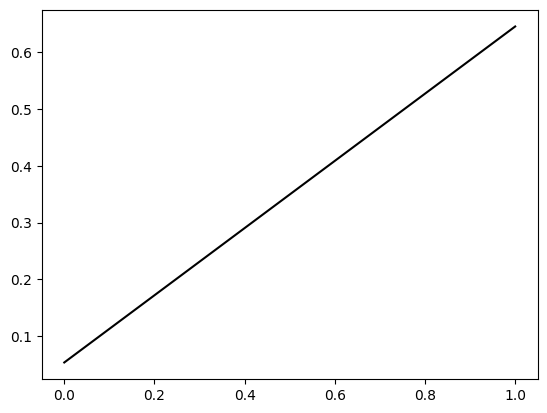

In [31]:
# # # STUDENT INPUT # # #
# Place your answers here

lr = 0.01 ### DO NOT CHANGE
num_steps = 1000 ### DO NOT CHANGE

# You can use SimpleLinearRegression here
model = SimpleLinearRegression(learning_rate=lr, iterations=num_steps)

# training loop
for step in range(num_steps):
    # perform a training step
    model.fit(x_data_full, y_data_full)

    # print the loss for each step if desired
    if step % 100 == 0:
        predictions = model.predict(x_data_full)
        loss = mse_loss(y_data_full, predictions)
        print(f"Step {step}: Loss = {loss}")

# print the final loss
final_predictions = model.predict(x_data_full)
final_loss = mse_loss(y_data_full, final_predictions)
print(f"Final Loss = {final_loss}")

# plot the line created by the trained theta
theta = [model.m, model.b]
plt.plot(x_data_full, calc(theta, x_data_full), color='black', label='Trained Line')

# Classify the points based on the line
true_x_a, true_y_a = separate(x_data_full, y_data_full, theta)
true_x_b, true_y_b = separate(x_data_full, y_data_full, theta)
plt.scatter(true_x_a, true_y_a, color='g', label='Class A')
plt.scatter(true_x_b, true_y_b, color='r', label='Class B')

# Plot the real line that separates the classes
plt.plot(x_data_full, calced_values, color='blue', label='Real Line')

# Add labels and legend to the plot
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title('Trained Linear Classifier vs. Real Line')


#### Part 5: What went wrong? (2 points)
In the textbox below, explain why you think this method of training the linear classifier from above Part 4 failed. Shouldn't it have worked? What lessons should you take away from this for doing machine learning in data science?


Try to write at least three sentences. The more you write here, the better, as the purpose of this question is to encourage ** deep thinking** about why our approach above didn't work. If you can support your work with math, that'll make your answer even stronger!!

The method likely failed due to the simplicity of the linear model and the complexity of the data distribution. Linear models assume a linear relationship between features and target variables. In this case, the data distribution may not be linearly separable, leading to poor classification performance.

To improve this, I should consider using more sophisticated models that can capture nonlinear relationships, such as support vector machines (SVMs), decision trees, or neural networks. Additionally, feature engineering or using kernel methods with SVMs can help transform the data into a more separable space, improving classification accuracy.

In data science and machine learning, it's crucial to understand the assumptions and limitations of the chosen models and to explore various techniques to address complex data distributions for better model performance.

### Handling More complicated data?

Excellent! We can classify data using a linear plane, and it's merely a mathematical exercise to extend this concept to higher dimensions.I.e. all the partials you computed earlier, now you just end up with more partial derivatives.

You have partial derivatives with each of the dimensions as you have a linear component in each of the dimensions.

Technically you also have 'y-intercepts' for each of the dimensions as well, but they can be combined into one constant term. This gives you $d+1$ weights to tune, where $d$ is the dimensionality of the X data.

But... what about this?

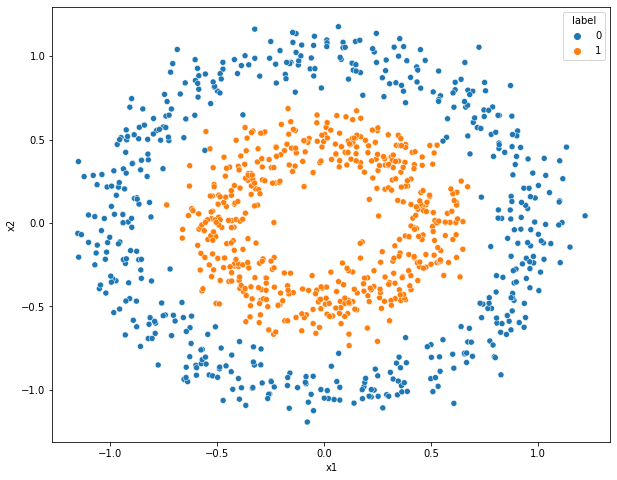

No good solution now...

What about this instead?

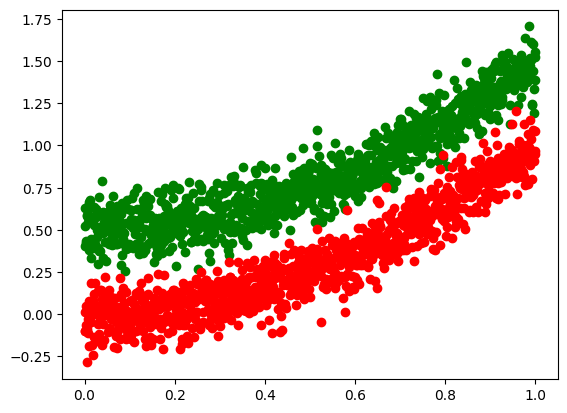

In [32]:
y_data_full = x_data_full ** 2

class_a = x_data_full ** 2 + np.random.normal(0.5, 0.1, x_data_full.shape[0])
class_b = x_data_full ** 2 + np.random.normal(0, 0.1, x_data_full.shape[0])

plt.scatter(x_data_full, class_a, color='g')
plt.scatter(x_data_full, class_b, color='r')

No good. We can't separate data that looks like that. Not linearly anyway.

BUT! What if we redefine our basis? Instead of our y direction being linear in x, what if it was $x^2$?

Text(0.5, 0, 'x squared')

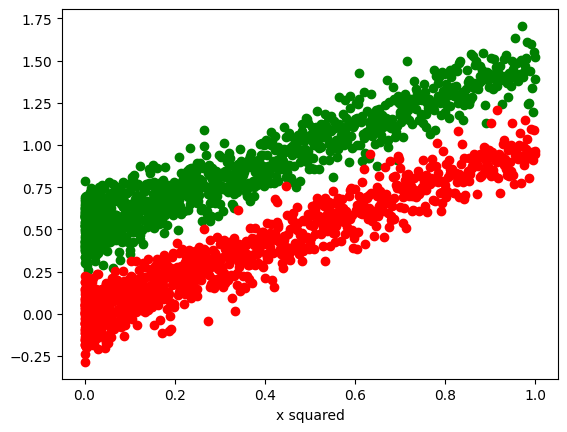

In [33]:
x_squared = x_data_full ** 2

plt.scatter(x_squared, class_a, color='g')
plt.scatter(x_squared, class_b, color='r')

plt.xlabel('x squared')

Hey look! It's linear! What does this mean? By casting into higher dimensional spaces through a **kernel function**, we can linearly separate our data.

Of course we chose a very simple kernel.

But for more complex data there are a variety of kernels. Go look some up! **'Kernel trick SVM'** should give you plenty of great resources.




#### Part 6: List some different kernels you found online, their names. (3 points)


*Your Answer Here*
*   Linear Kernel: K(x, y) = (x^T)y
*   Polynomial Kernel: K(x, y) = ((x^T) + c)^d
*   Sigmoid Kernel: K(x, y) = tanh(α(x^T)y + c) where α and c are constants



#### Now, our final point is that **figuring out the kernel to use** is incredibly difficult, and effectively maps our data from raw $(x, y)$ space to some feature space $(\phi(x), \phi(y))$ as fixed by our kernel function.

To **learn** this feature space, instead of guess and check with kernel methods, we invented **neural networks**... and many other methods that perform **representation learning**. **THIS** is the power of neural networks.

### Final Section: Neural Networks (15 points)

In the final test, and meat of the homework, we want you to perform a real world regression all on your own. You know the fundamental underlying ideas, so let's use some real world libraries and methods to actually do regression on a **real** dataset.

We'll be using pytorch for this next section. Look at (https://colab.research.google.com/github/pytorch/tutorials/blob/gh-pages/_downloads/070179efc13bd796c5dd4af7bf52d5b9/intro.ipynb) for a run down on pytorch basics.

1. Import pytorch and sklearn, and use them to download the https://scikit-learn.org/stable/datasets/real_world.html#california-housing-dataset
2. Prepare a train and test dataset from the data. ONLY USE the TRAIN dataset for training!! Note that sklearn should do this for you.
3. Build a model in pytorch. Use the tutorials to help you.
4. Build the training loop! Train your network and share your results with us. Plot your loss curve over time.
5. Marvel at the multi-dimensional representation learning power of neural networks ! : )

You are free to use whatever hyperparameters or optimizer you prefer... though 'Adam' may be more powerful than the gradient descent you learned about in class.

Epoch 1/100, Loss: 251.1938
Epoch 2/100, Loss: 1.1438
Epoch 3/100, Loss: 0.7811
Epoch 4/100, Loss: 0.7025
Epoch 5/100, Loss: 0.6651
Epoch 6/100, Loss: 0.6317
Epoch 7/100, Loss: 0.6711
Epoch 8/100, Loss: 0.5889
Epoch 9/100, Loss: 0.6498
Epoch 10/100, Loss: 0.6168
Epoch 11/100, Loss: 0.6316
Epoch 12/100, Loss: 0.6573
Epoch 13/100, Loss: 0.6765
Epoch 14/100, Loss: 6.0900
Epoch 15/100, Loss: 0.7123
Epoch 16/100, Loss: 0.6706
Epoch 17/100, Loss: 0.7713
Epoch 18/100, Loss: 0.7043
Epoch 19/100, Loss: 0.8736
Epoch 20/100, Loss: 2.1199
Epoch 21/100, Loss: 3.1880
Epoch 22/100, Loss: 0.6775
Epoch 23/100, Loss: 1.8524
Epoch 24/100, Loss: 1.0890
Epoch 25/100, Loss: 0.6356
Epoch 26/100, Loss: 9.2978
Epoch 27/100, Loss: 0.9292
Epoch 28/100, Loss: 1.2384
Epoch 29/100, Loss: 0.5805
Epoch 30/100, Loss: 0.6193
Epoch 31/100, Loss: 0.7677
Epoch 32/100, Loss: 4.1682
Epoch 33/100, Loss: 1.8501
Epoch 34/100, Loss: 0.6152
Epoch 35/100, Loss: 0.8598
Epoch 36/100, Loss: 0.9281
Epoch 37/100, Loss: 1.6605
Epoch 38

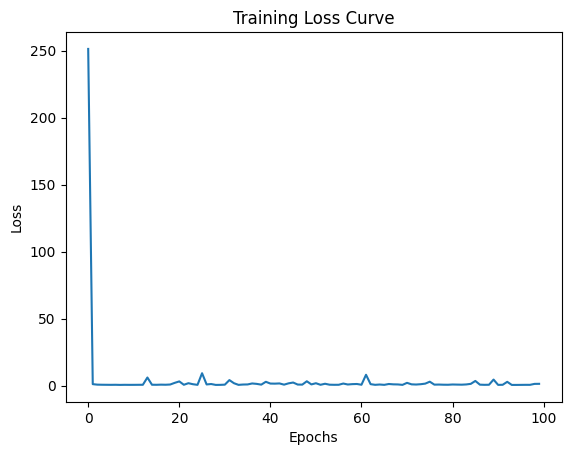

Test Loss: 1.3409


In [34]:
# # # Student response

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import torch
from torch.utils.data import DataLoader, TensorDataset
import torch.nn as nn
import torch.optim as optim

# Load the data
data = fetch_california_housing()
X, y = data.data, data.target

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Your code below

# standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

# create dataloader for training and testing data
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

# this is the NN model
class NeuralNet(nn.Module):
    def __init__(self, input_size):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(64, 1)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

# initialize the model
model = NeuralNet(input_size=X_train.shape[1])

# define loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


# train!
losses = []
epochs = 100
for epoch in range(epochs):
    epoch_loss = 0
    for inputs, targets in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs.squeeze(), targets)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
    epoch_loss /= len(train_loader)
    losses.append(epoch_loss)
    print(f'Epoch {epoch+1}/{epochs}, Loss: {epoch_loss:.4f}')

# plot the loss curve
plt.plot(losses)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss Curve')
plt.show()

# evaluate the model on the test set
model.eval()
with torch.no_grad():
    y_pred = model(X_test_tensor)
    test_loss = criterion(y_pred.squeeze(), y_test_tensor)
    print(f'Test Loss: {test_loss.item():.4f}')


## Bonus Question: Calculate the Exact Solution to the Linear Regressor (5 points)

Derive exact solution for $\theta$ when $$L = \frac{1}{N} (X \theta - y)^T (X \theta - y))$$

This is for multidimensional linear regression, and is the exact solution overall. Your answer should be the solution for $\theta$ that results in the **minimal value for the loss**. This is ideally the value that all gradient descent approaches would converge to during linear regression gradient descent.

**Student response here** (preferred latex, equation must be readable)

X^T is the transpose of T, with dimensions (d+1)xN

(X^T)X is the matrix product of X^T and X, with dimensions (d+1)x(d+1)

(X^T)y is the matrix product of X^T and y, with dimensions (d+1)x1

We set the derivative to zero:

(∂L)/(∂θ) = 0

(∂L)/(∂θ) = (2/N)((X^T)Xθ - (X^T)y)

(2/N)((X^T)Xθ - (X^T)y) = 0

(X^T)Xθ - (X^T)y = 0

(X^T)Xθ = (X^T)y

θ = ((X^T)^-1)((X^T)y)